In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("AQI and Lat Long of Countries.csv")
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [4]:
scaler = MinMaxScaler()

scaler.fit(df[['lat']])
scaler.fit(df[['lng']])

df['lat_trained'] = scaler.transform(df[['lat']])
df['lng_trained'] = scaler.transform(df[['lng']])

df.head()

C:\Users\beek6\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- lat
Feature names seen at fit time, yet now missing:
- lng

  warnings.warn(message, FutureWarning)


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng,lat_trained,lng_trained
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031,0.618966,0.617418
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900,0.475916,0.363841
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869,0.458745,0.370998
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833,0.597301,0.534450
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833,0.642617,0.550746


In [5]:
k_range = range(1,15)

list_dist = []

for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(df[['lat_trained','lng_trained']])
    list_dist.append(model.inertia_)

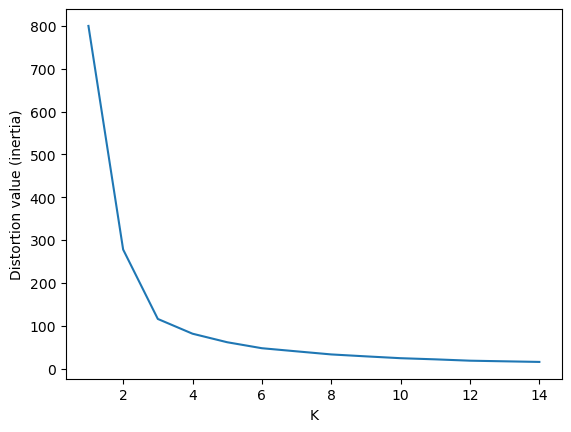

In [6]:
from matplotlib import pyplot as plt

plt.xlabel('K')
plt.ylabel('Distortion value (inertia)')
plt.plot(k_range, list_dist)
plt.show()

# K=4

In [36]:
model = KMeans(n_clusters=3)
y_predicted = model.fit_predict(df[['lat_trained','lng_trained']])
y_predicted

array([2, 0, 0, ..., 0, 2, 0])

In [37]:
df['size'] = 0.5
df['cluster'] = y_predicted
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng,lat_trained,lng_trained,cluster,size
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031,0.618966,0.617418,2,0.5
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900,0.475916,0.363841,0,0.5
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869,0.458745,0.370998,0,0.5
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833,0.597301,0.534450,2,0.5
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833,0.642617,0.550746,2,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285,0.598402,0.269955,0,0.5
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219,0.631319,0.545139,2,0.5
16692,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,36.3385,-88.8513,0.594933,0.237011,0,0.5
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906,0.630500,0.497589,2,0.5


In [38]:
import plotly.express as px
figure = px.scatter_mapbox(df, lat='lat', lon='lng',
                           center = dict(lat = 37.8, lon = -122.4),
                           zoom = 9,
                           opacity = 0.5,
                           mapbox_style = 'stamen-terrain',
                           color = 'AQI Category',
                           title = 'Hava Kirliliği',
                           width = 1100,
                           height = 700,
                           hover_data = ['cluster', 'City','lat','lng'],
                           size='size'
                          )
figure.show()